# 8. Закрепление знаний
✍️ Настало время потренироваться в очистке данных! В этот раз тема особенно важная — поговорим о диабете.

Вам предоставлен [набор данных](https://lms.skillfactory.ru/assets/courseware/v1/6559ab1e1d17acac79bec5dc8052261b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/diabetes_data.zip), первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 

Этот набор данных создан для того, чтобы на основе определённых диагностических измерений предсказать, есть ли у пациента диабет. 

На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима.

Прочитаем наши данные и выведем первые пять строк таблицы:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


Признаки в данных:

- Pregnancies — количество беременностей.
- Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.
- BloodPressure — диастолическое артериальное давление (мм рт. ст.).
- SkinThickness — толщина кожной складки трицепса (мм).
- Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).
- BMI — индекс массы тела $BMI = \frac{вес}{рост^2}$.
- DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).
- Age — возраст.
- Outcome — наличие диабета (0 — нет, 1 — да).

Предварительно вы можете провести небольшой разведывательный анализ: посмотреть на распределения признаков и оценить их взаимосвязь с признаком наличия диабета.

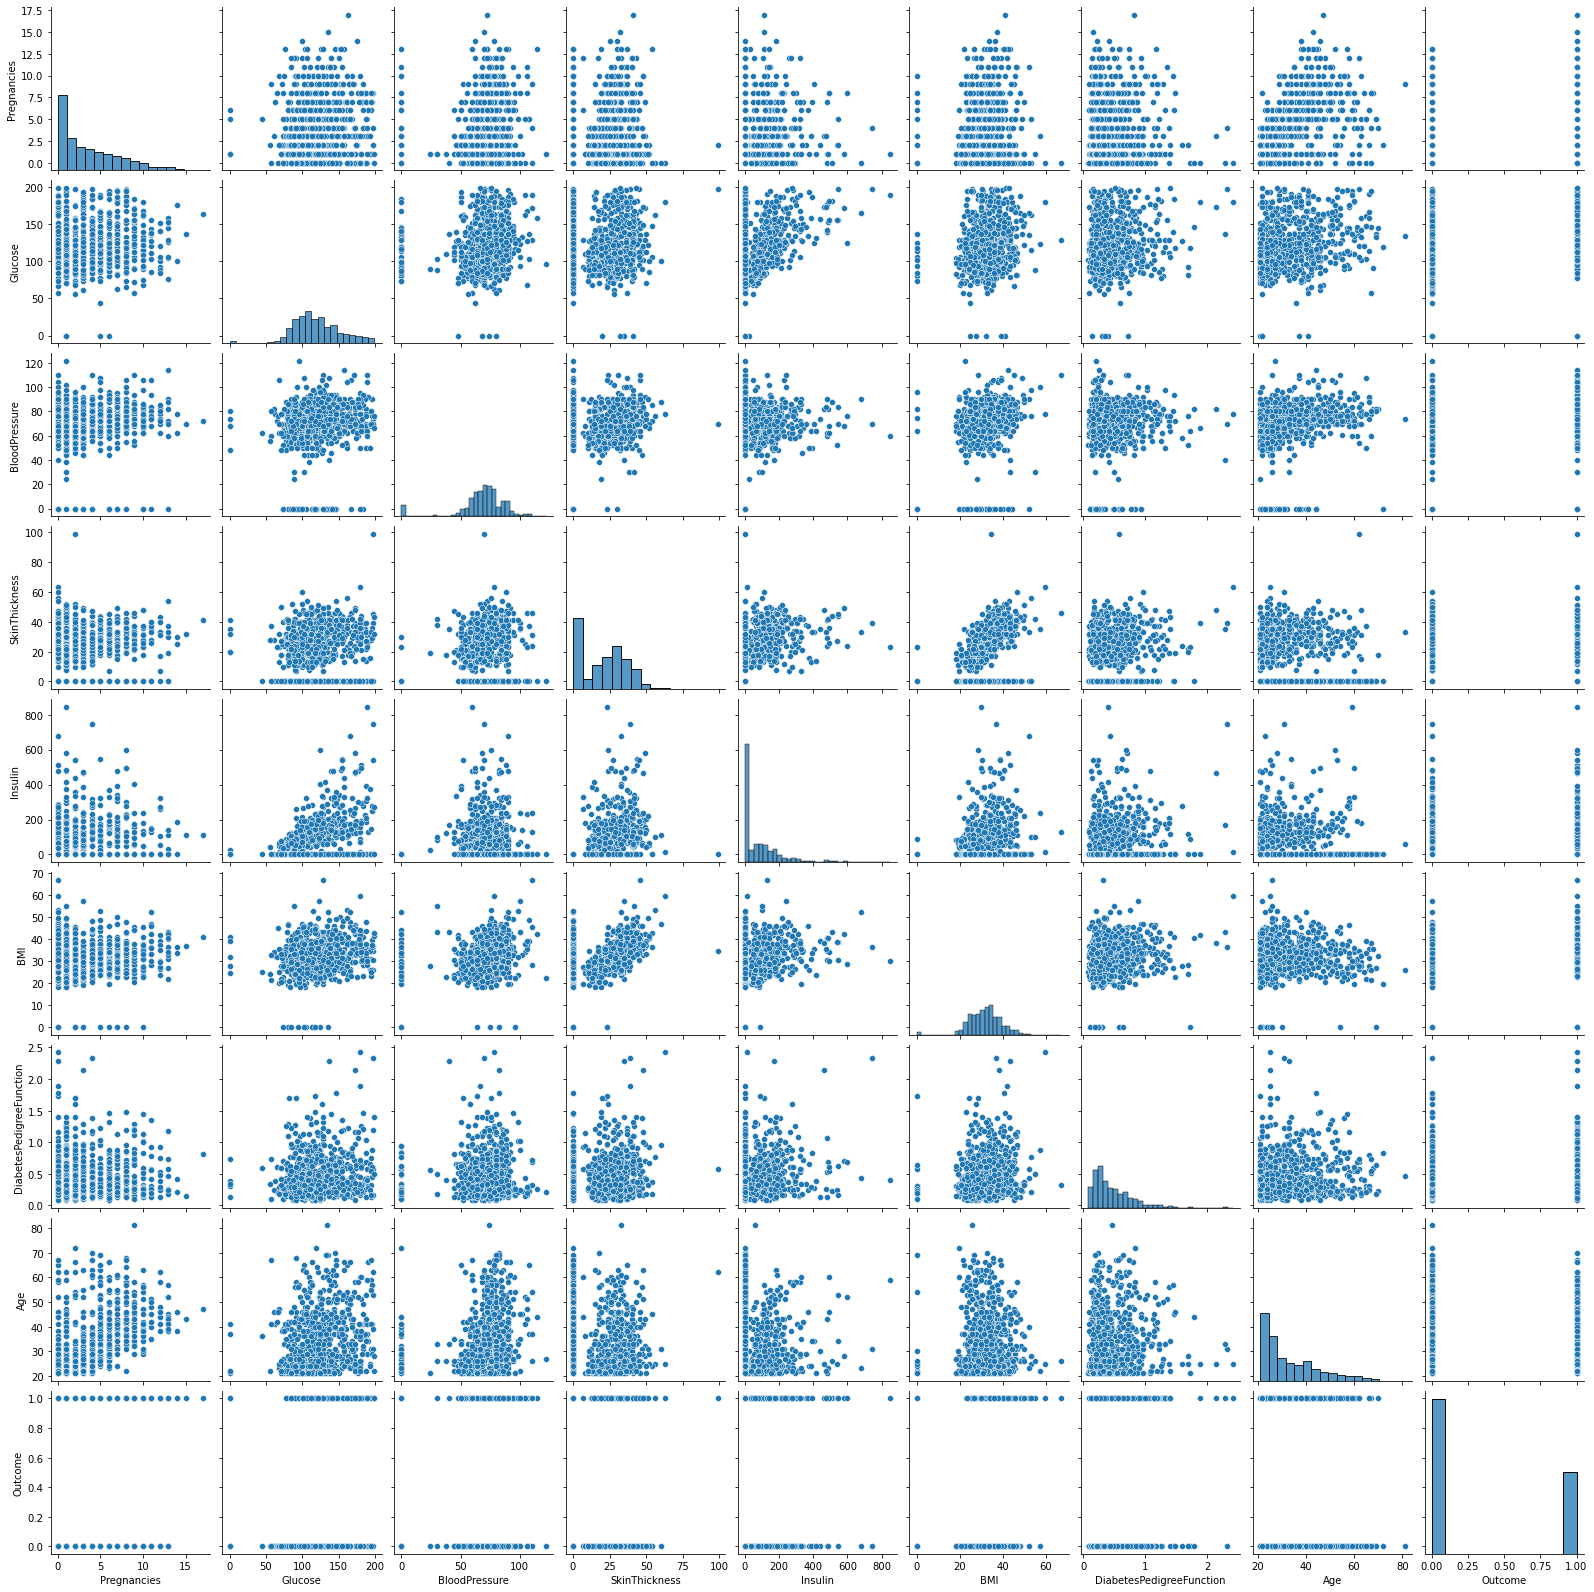

In [3]:
sns.pairplot(data=diabetes)

### Задание 8.1
Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [4]:
diabetes.drop_duplicates(inplace=True)
print((f'Ответ: {diabetes.shape[0]}'))


Ответ: 768


### Задание 8.2
Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [5]:
def find_non_informative_features(data: pd.DataFrame, rep_thresh: float = 0.95, uniq_thresh: float = 0.95):
    """
    Returns a list of non-informative columns in DataFrame


    Args:
        data (pd.DataFrame): DataFrame to analize
        rep_thresh (float): from 0 to 1 - rate of most repeated value
        uniq_thresh (float): from 0 to 1 - rate of uniqueness of values

    Returns:
        list of non-informative column names
    """
    #список неинформативных признаков
    low_information_cols = []

    #цикл по всем столбцам
    for col in data.columns:
        #наибольшая относительная частота в признаке
        top_freq = data[col].value_counts(normalize=True).max()
        #доля уникальных значений от размера признака
        nunique_ratio = data[col].nunique() / data[col].count()
        # сравниваем наибольшую частоту с порогом
        if top_freq > rep_thresh:
            low_information_cols.append(col)
        # сравниваем долю уникальных значений с порогом
        if nunique_ratio > uniq_thresh:
            low_information_cols.append(col)
    
    return low_information_cols

In [6]:
non_informative_cols = find_non_informative_features(diabetes)
diabetes.drop(columns=non_informative_cols, inplace=True)

### Задание 8.3

Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.



In [7]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    diabetes[col] = diabetes[col].apply(lambda x: x if x != 0 else np.nan)

In [8]:
round(diabetes['Insulin'].isna().sum() / diabetes.shape[0], 2)

0.49

### Задание 8.4

Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?



In [9]:
diabetes.dropna(axis=1, thresh=0.7*diabetes.shape[0], inplace=True)
print(f'Ответ: {diabetes.shape[1]}')

Ответ: 8


### Задание 8.5

Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?


In [10]:
diabetes.dropna(axis=0, thresh=diabetes.shape[1] - 2, inplace=True)
print(f'Ответ: {diabetes.shape[0]}')

Ответ: 761


### Задание 8.6
В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [14]:
values = {col: diabetes[col].median() for col in diabetes.columns}
diabetes.fillna(value=values, inplace=True)
print(f"Ответ: {diabetes['SkinThickness'].mean():.1f}")

Ответ: 29.1


### Задание 8.7
Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [16]:
quant_75 = diabetes['SkinThickness'].quantile(0.75)
quant_25 = diabetes['SkinThickness'].quantile(0.25)
iqr = quant_75 - quant_25
lower_bound = quant_25 - 1.5 * iqr
upper_bound = quant_75 + 1.5 * iqr
outliers_num = ((diabetes['SkinThickness'] < lower_bound) | (diabetes['SkinThickness'] > upper_bound)).sum()
print(f'Ответ: {outliers_num}')

Ответ: 87


### Задание 8.8
Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [17]:
mu = diabetes['SkinThickness'].mean()
sigma = diabetes['SkinThickness'].std()

lower_bound = mu - 3 * sigma
upper_bound = mu + 3 * sigma
outliers_num = ((diabetes['SkinThickness'] < lower_bound) | (diabetes['SkinThickness'] > upper_bound)).sum()
print(f'Ответ: {outliers_num}')

Ответ: 4


### Задание 8.9
На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

![](img/dst-3-unit-1-mod-14-35.png)

Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [19]:
def outliers_iqr_mod(data, feature, log_scale=True, addition=0, left=1.5, right=1.5):
    """
    Давайте немного модифицируем нашу функцию outliers_iqr(). 
    Добавьте в нее параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5).
    Функция, как и раньше должна возвращать потенциальные выбросы и очищенный DataFrame.
    """
    x = data[feature]
    x = np.log(data[feature] + addition) if log_scale else data[feature]

    quartile_1 = x.quantile(0.25)
    quartile_3 = x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - left * iqr
    upper_bound = quartile_3 + right * iqr
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]

    return outliers, cleaned


In [21]:
outliers, cleaned = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=False)
outliers_num = outliers.shape[0]
outliers, cleaned = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
log_outliers_num = outliers.shape[0]
answer = outliers_num - log_outliers_num
print(f'Ответ: {answer}')


Ответ: 29
